Pairing correlations

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import Matrix

In [2]:
# Making a factorial function to get the output as an array
def factorial(n):
    F = [1]
    for i in range (1,int(n+1)):
        F.append(i*F[i-1])
    return F

In [3]:
def cg_coeff1(j1, j2, m1, m2, j):
    F = factorial(20)
    m = m1 + m2
    a = math.sqrt((2*j+1)*F[int(j+j1-j2)]*F[int(j-j1+j2)]*F[int(j1+j2-j)]*F[int(j+m)]*F[int(j-m)]*F[int(j1-m1)]*F[int(j1+m1)]*F[int(j2-m2)]*F[int(j2+m2)]/F[int(j1+j2+j+1)])
    k_max = min((j1+j2-j),(j1-m1),(j2+m2))
    k_min = -min(0,(j-j2+m1),(j-j1-m2))
    b = 0
    for k in range(int(k_min), int(k_max+1)):
        b = b + ((-1)**k)/(F[int(k)]*F[int(j1+j2-j-k)]*F[int(j1-m1-k)]*F[int(j2+m2-k)]*F[int(j-j2+m1+k)]*F[int(j-j1-m2+k)])
    return (a*b)

In [4]:
def function1(A, delta_list):    
    Energy = []
    N_max = 4
    kap = 0.05
    mu = [0,0,0,0.35,0.625,0.63,0.448,0.434]
    for N in range (N_max+1):
        for i in range (N+1):
            om = i+0.5
            l_list = []
            lam_list = []
            sig_list = []
            H = []

            # Calculate basis for given value of N and om
            for l in range (N,-1,-2):
                for lam in range (-l, l+1):
                    sig = om - lam
                    if (abs(abs(sig)-0.5)<0.001):
                        l_list.append(l)
                        lam_list.append(lam)
                        sig_list.append(sig)

            # Calculate the hamiltonian matrix, <i|H|j>
            nbas = len(l_list)
            for delta in delta_list:
                H.append([])
                fdel = ((((1+2*delta/3)**(2))*(1-4*delta/3))**(-1/6))
                hw00 = 41*(A**(-1/3))
                hw0 = hw00*fdel
                C = -kap*2*hw00
                D = C*mu[N]/2.0
                for i in range(nbas):
                    H[-1].append([])
                    li = l_list[i]
                    lami = lam_list[i]
                    sigi = sig_list[i]
                    for j in range (nbas):
                        lj = l_list[j]
                        lamj = lam_list[j]
                        sigj = sig_list[j]

                        if (i==j):
                            h00 = (N+1.5)*hw0
                            hl2 = D*lj*(lj+1)
                            hls = C*lamj*sigj
                            hr2 = N+1.5
                        else:
                            h00 = 0
                            hl2 = 0
                        if (abs(li-lj)<0.001):
                            if (abs(lami-lamj-1)<0.001)and (abs(sigi-sigj+1)<0.001):
                                hls = C*0.5*math.sqrt((lj-lamj)*(lj+lamj+1))
                            elif (abs(lami-lamj+1)<0.001)and (abs(sigi-sigj-1)<0.001):
                                hls = C*0.5*math.sqrt((lj+lamj)*(lj-lamj+1))
                        else:
                            hls = 0
                        if (abs(lami-lamj)<0.001) and (abs(sigi-sigj)<0.001):
                            hY0 = cg_coeff1(lj, 2, lamj, 0, li)*cg_coeff1(lj, 2, 0, 0, li)*math.sqrt((2*lj+1)/(2*li+1))
                            if (abs(li-lj+2)<0.001):
                                hr2 = math.sqrt((N-lj+2)*(N+lj+1))
                            elif (abs(li-lj-2)<0.001):
                                hr2 = math.sqrt((N-lj)*(N+lj+3))
                        else:
                            hr2 = 0
                            hY0 = 0
                        hdelta = -delta*hw0*(2/3)*hr2*hY0
                        H[-1][-1].append(h00+hdelta+hls+hl2)
                        
            # Diagonalise H
            diagH = []
            diagHs = []
            for i in range (len(H)):
                P, diag = Matrix(H[i]).diagonalize()
                diagHs.append(sorted(np.diagonal(diag).tolist()))
            diagHs = np.array(diagHs)
            for i in range(len(l_list)):
                y = diagHs[:,i].tolist()
                Energy.append(y)
    return Energy

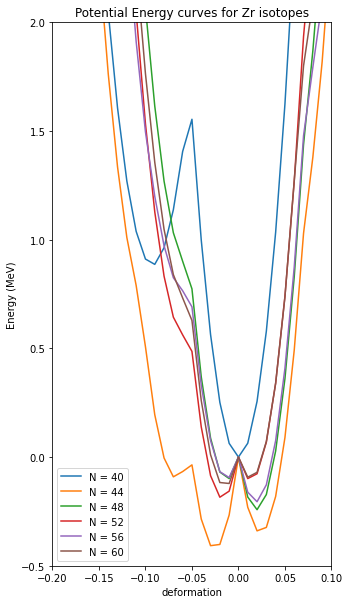

In [5]:
Z = 40
delta_list = [x/100 for x in range(-20,11,1)]
plt.figure(figsize=(5,10))
ax = plt.gca()
ax.set_xlim([-0.2, 0.1])
ax.set_ylim([-0.5, 2.0])
plt.title('Potential Energy curves for Zr isotopes')
plt.ylabel('Energy (MeV)')
plt.xlabel('deformation')
for A in range(80,101,4):
    Energy = function1(A, delta_list)
    Energy = np.array(Energy)
    N = A - Z
    y = []
    i = delta_list.index(0)
    Energies = sorted(Energy[:,i])
    e0 = 0
    for j in range(int(round(Z/2,2))):
        e0 = e0 + 2*Energies[j]
    for j in range(int(round(N/2,2))):
        e0 = e0 + 2*Energies[j]
    if Z%2!=0:
        e0 = e0 + Energies[int(Z/2)+1]
    if N%2!=0:
        e0 = e0 + Energies[int(N/2)+1]
    for i in range(len(delta_list)):
        Energies = sorted(Energy[:,i])
        e = 0
        for j in range(int(round(Z/2,2))):
            e = e + 2*Energies[j]
        for j in range(int(round(N/2,2))):
            e = e + 2*Energies[j]
        if Z%2!=0:
            e = e + Energies[int(Z/2)+1]
        if N%2!=0:
            e = e + Energies[int(N/2)+1]
        y.append(e-e0)
    plt.plot(delta_list,y, label = 'N = {}'.format(N))  
ax.legend()